In [1]:
# Created: 20250104

In [2]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [3]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Step 2: Calculate Turtle Trading Channels
def calculate_turtle_channels(data, period=20):
    data['Upper Channel'] = data['High'].rolling(window=period).max()
    data['Lower Channel'] = data['Low'].rolling(window=period).min()
    data['Midpoint Channel'] = (data['Upper Channel'] + data['Lower Channel']) / 2
    return data

In [7]:
def show_graph(symbol):
    
    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply Turtle Channels calculation
    period = 20  # Default lookback period
    data = calculate_turtle_channels(data, period)
    
    # Step 3: Plot Close Price and Turtle Channels
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.plot(data['Close'], label='Close Price', color='blue', linewidth=1)
    
    # Plot Turtle Channels
    plt.plot(data['Upper Channel'], label='Upper Channel', color='green', linestyle='--')
    plt.plot(data['Lower Channel'], label='Lower Channel', color='red', linestyle='--')
    plt.plot(data['Midpoint Channel'], label='Midpoint Channel', color='purple', linestyle='--')
    
    # Customize the plot
    plt.title(f'{symbol} Turtle Trading Channels (Period: {period})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


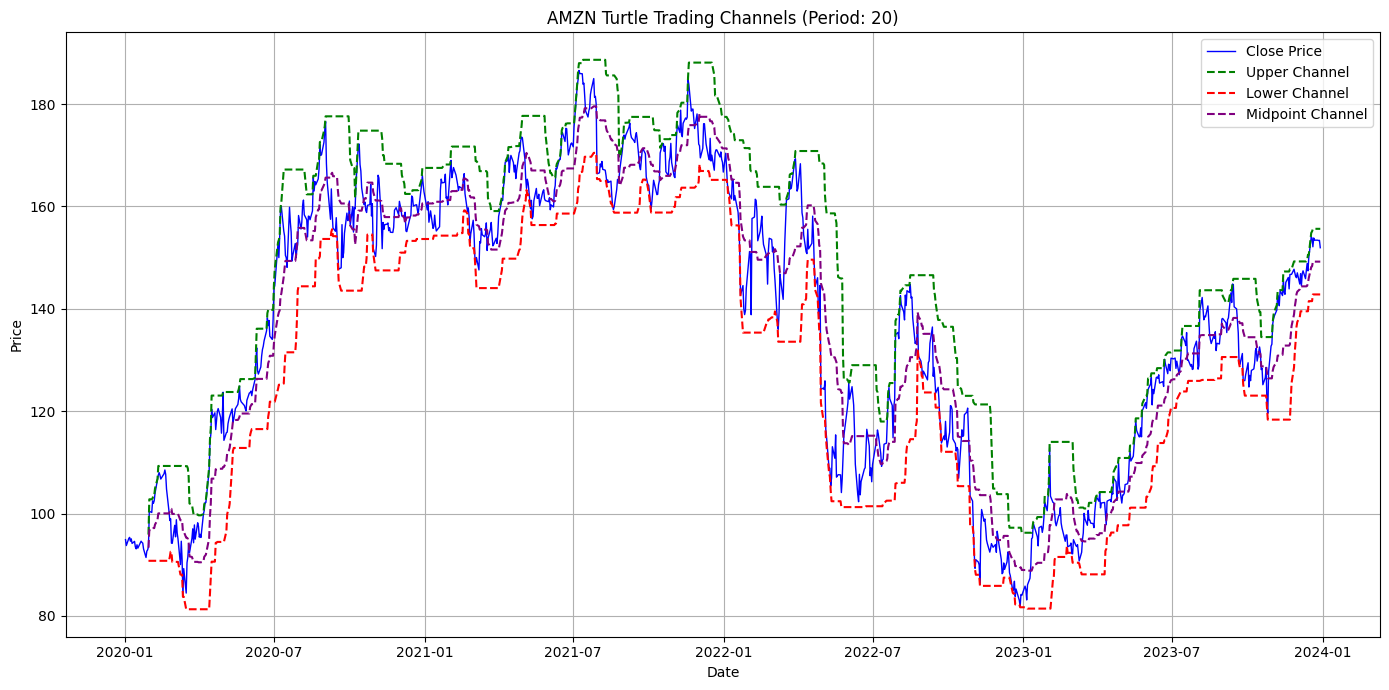

In [8]:
show_graph("AMZN")